In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 取得均線
N 是設定取得N日均線
並且使用盤中高價、盤中低價做均線的計算

使用盤中高低價，是為了要把買方與賣方的拉扯找到平均

因為開盤跟收盤可能不夠全面代表今天的買賣情況

而實驗後，也是取這個價格去計算後的結果比較好

In [2]:
def getMA(data, today, N):
    # no MA
    if today+1 < N:
        return -1
    
    total = 0
    for i in range(N):
        # total += data[0][today-i]
        total += data[1][today-i]
        total += data[2][today-i]
        # total += data[3][today-i]
    
    return total / 2 / N

In [3]:
testing_data = pd.read_csv("testing_data.csv", header=None)

### 漲跌判斷
利用 5 日均線跟 10 日均線以及收盤價

去判斷該股票的狀況

`收盤價 > 5日均線 > 10日均線`

代表 今天的買方力量明顯比起前幾天多

很有可能要漲起來，就可以買股票

`收盤價 < 5日均線 < 10日均線`

明顯賣方力量前，價格很可能要開始跌

就要快點拋售股票

### 特別處理

因為資料前面會有算不出均線的情況

所以會把算不出來的設置為收盤價

避免判斷上的錯誤

In [4]:
actions = list()
states = list()
ma5s = list()
ma10s = list()
state = 0
for index,row in testing_data.iterrows():

    ma5 = getMA(testing_data, index, 5)
    ma10 = getMA(testing_data, index, 10)

    close = row[3]
    
    if ma5 == -1:
        ma5 = close
    if ma10 == -1:
        ma10 = close
    
    states.append(state)
    
    if close > ma5 and ma5 > ma10 and state < 1:
        action = 1
        state += 1
    elif ma10 > ma5 and ma5 > close and state > -1:
        action = -1
        state -= 1
    else:
        action = 0

    if index == testing_data.shape[0]-1:
        break
    
    actions.append(action)
    ma5s.append(ma5)
    ma10s.append(ma10)

### 圖表說明

觀察判斷結果
 
- 黑色線代表 action 
- 綠色線代表 state

可以看到快要跌的時候會賣出
有要漲就會快點買進

因此到最後整體收益是不錯的

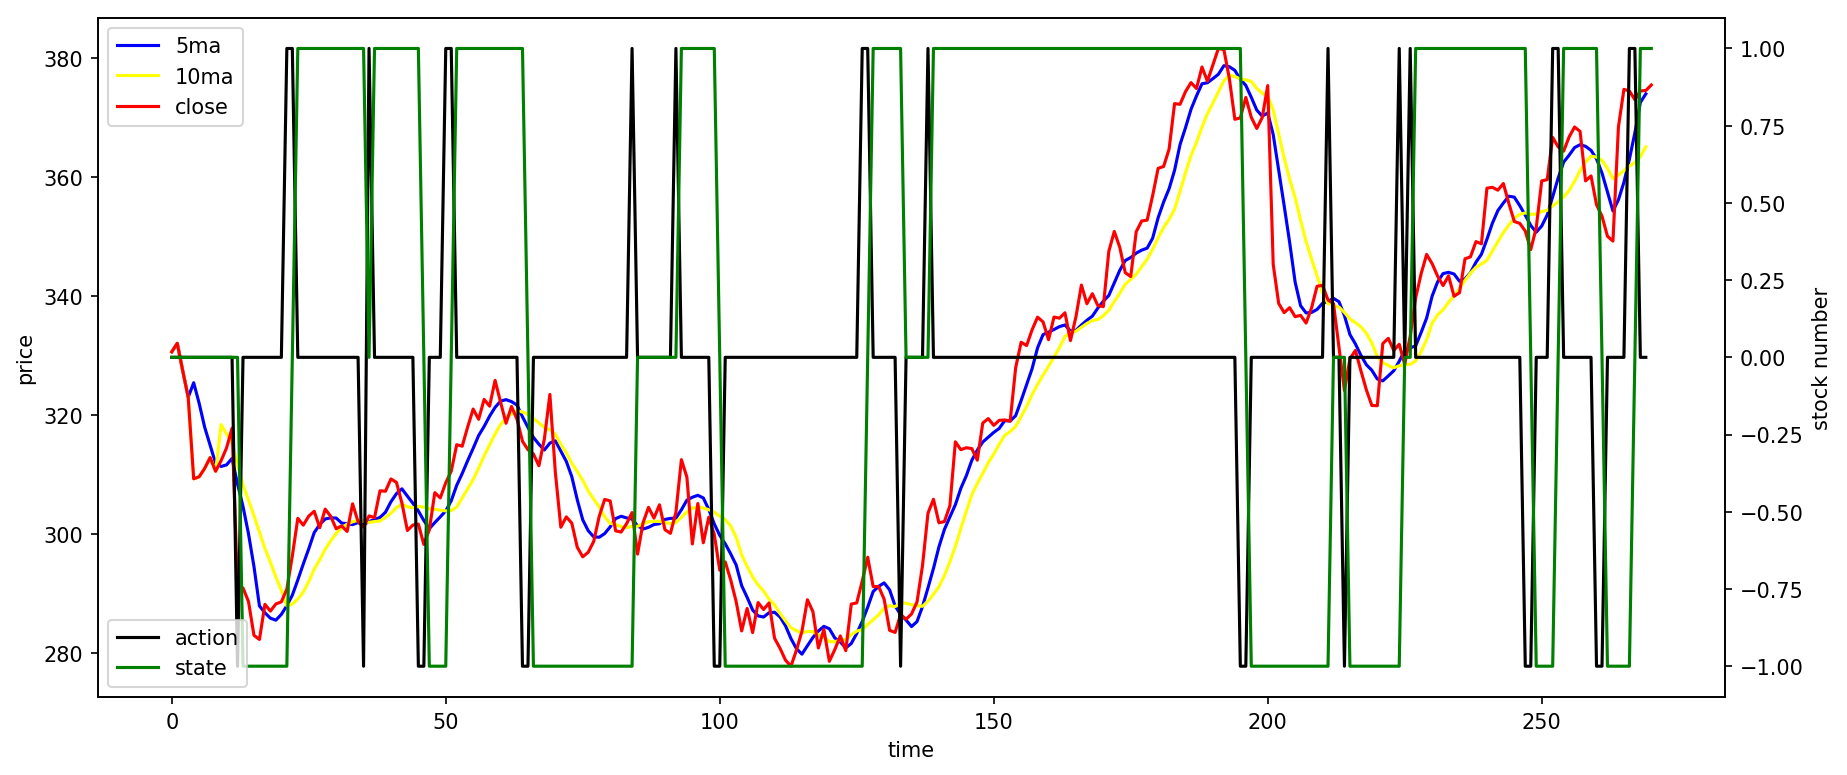

In [28]:
fig = plt.figure(figsize=(14,6),dpi=150)
ax1 = fig.add_subplot(111)
ax1.plot(ma5s, color="blue", label="5ma")
ax1.plot(ma10s, color="yellow", label="10ma")
ax1.plot(testing_data[3].values, color="red", label="close")
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('price')
ax2 = ax1.twinx()
ax2.plot(actions, color="black", label = "action")
ax2.plot(states, color="green", label = "state")
plt.ylabel("stock number")
plt.legend(loc='lower left')
